<a href="https://colab.research.google.com/github/juansokil/Deep_Learning/blob/master/02-Partidos_Politicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Ir hasta mi usuario###
cd .. 
##Activar el virtual environment##
. juanpablosokil/deep_learning/bin/activate

##voy a mi carpeta##
cd juanpablosokil/deep_learning

##Accedo a la notebook de notebook
jupyter notebook


In [0]:
import tensorflow as tf
import keras
import numpy as np
import numpy as np
print(tf.__version__)


1.13.1


In [0]:
###Generador de Imagenes###
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
###debo cargar una carpeta entera###
train_generator = train_datagen.flow_from_directory(
        '/mnt/c/source/deep_learning/partidos_politicos/train/',
        batch_size=4,
        target_size=(100, 100),
        color_mode = 'rgb',    
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
        '/mnt/c/source/deep_learning/partidos_politicos/test/',
        batch_size=1,
        target_size=(100, 100),
        color_mode = 'rgb',    
    class_mode = 'binary')


Found 43 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.regularizers import l2

#The process of building a Convolutional Neural Network always involves four major steps.
#Step - 1 : Convolution
#Step - 2 : Pooling
#Step - 3 : Flattening
#Step - 4 : Full connection

model = models.Sequential()
#### 64 es la cantidad de neuronas###
####kernel_size 3x3 es lo más frecuente, se puede usar 5x5###
model.add(Conv2D(32, (3,3), input_shape = (100, 100, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
model.add(Conv2D(64, (3,3), border_mode='same',activation='relu'))
###Max pooling selecciona el valor maximo de la convulsion###
model.add(MaxPooling2D(pool_size = (2, 2)))
###Crea aleatoriedad en el modelo###
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 49, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 153664)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 153665    
_________________________________________________________________
activation_16 (Activation)   (None, 1)                 0         
Total para

/home/juanpablosokil/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`


In [0]:

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size


H=model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)


#https://mc.ai/tutorial-image-classification-with-keras-flow_from_directory-and-generators/

Epoch 1/10
10/10 [==============================] - 6s 626ms/step - loss: 4.1093 - acc: 0.6500 - val_loss: 10.3028 - val_acc: 0.3568
Epoch 2/10
10/10 [==============================] - 6s 553ms/step - loss: 3.7629 - acc: 0.7669 - val_loss: 10.2992 - val_acc: 0.3568
Epoch 3/10
10/10 [==============================] - 5s 541ms/step - loss: 5.3574 - acc: 0.6667 - val_loss: 10.2959 - val_acc: 0.3568
Epoch 4/10
10/10 [==============================] - 5s 549ms/step - loss: 2.8365 - acc: 0.8246 - val_loss: 10.2929 - val_acc: 0.3568
Epoch 5/10
10/10 [==============================] - 5s 539ms/step - loss: 5.6301 - acc: 0.6492 - val_loss: 10.2901 - val_acc: 0.3568
Epoch 6/10
10/10 [==============================] - 5s 541ms/step - loss: 2.4315 - acc: 0.8497 - val_loss: 10.2875 - val_acc: 0.3568
Epoch 7/10
10/10 [==============================] - 5s 543ms/step - loss: 4.1476 - acc: 0.7418 - val_loss: 10.2850 - val_acc: 0.3568
Epoch 8/10
10/10 [==============================] - 5s 541ms/step - l

In [0]:
scores_generator = model.evaluate_generator(test_generator, steps=5)
scores_generator

[15.964964866638184, 0.0]

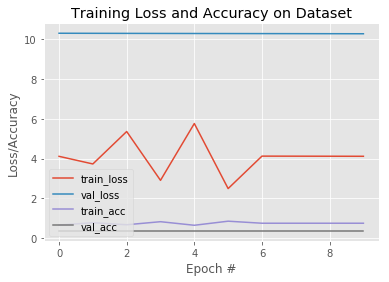

In [0]:

import matplotlib.pyplot as plt

# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

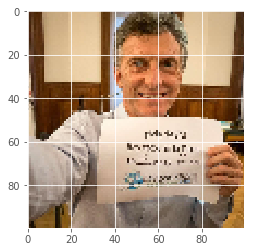

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

test_image = image.load_img('/mnt/c/source/deep_learning/partidos_politicos/mauricio.jpg', target_size = (100, 100))
numpy_image = img_to_array(test_image)
plt.imshow(np.uint8(numpy_image))
plt.show() 

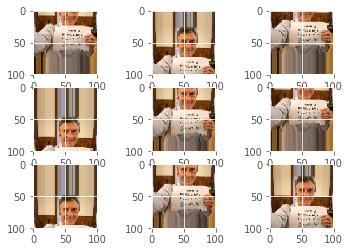

In [0]:
###DATA AUGMENTATION###

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = image.load_img('/mnt/c/source/deep_learning/partidos_politicos/mauricio.jpg', target_size = (100, 100))
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint32')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

img_tensor = image.img_to_array(test_image)
img_tensor = np.expand_dims (img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)


AttributeError: 'numpy.ndarray' object has no attribute 'img_to_array'

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 98, 98, 32)


<function matplotlib.pyplot.show(*args, **kw)>

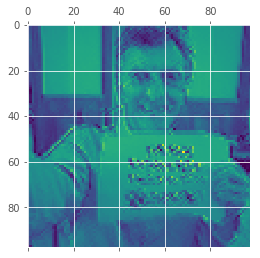

In [0]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show

/home/juanpablosokil/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


MemoryError: 

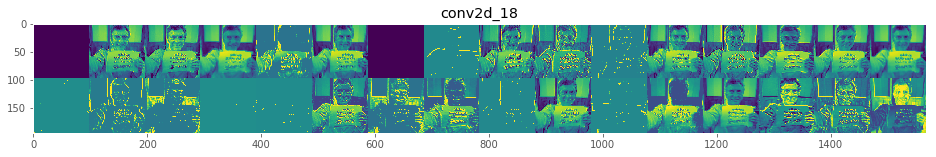

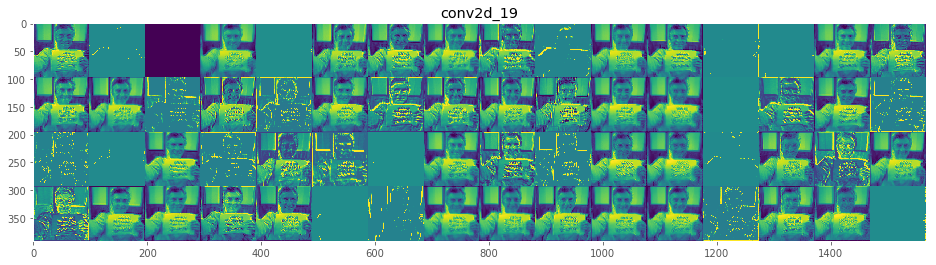

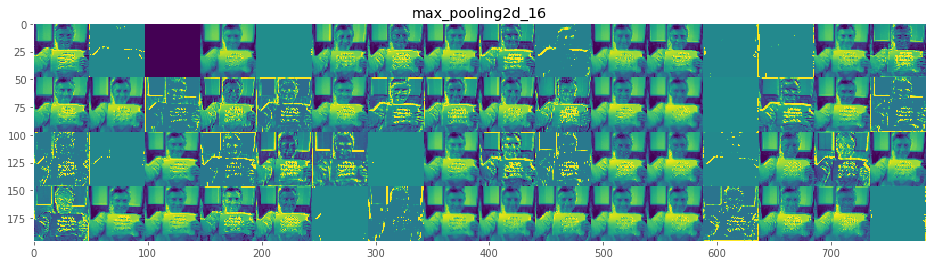

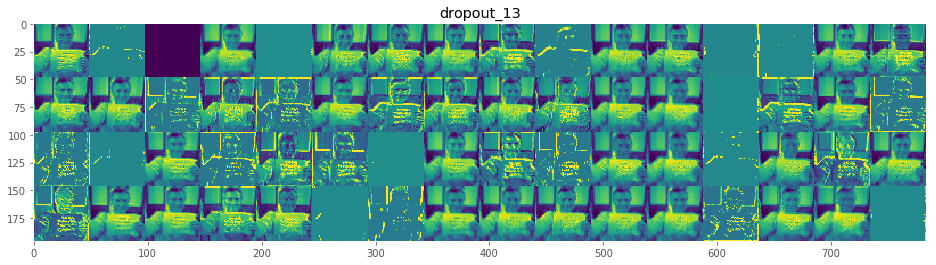

In [0]:
import keras

# Imprimimos todas las activaciones 

# Usamos los nombres de las capas para el plot
# De cada model.layers guardamos el layer.name

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Ahora veamos nuestros feature maps
# Iteramos las activaciones y los layer_names
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    # Shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # Matriz para mostrar las activaciones
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            
            # Postprocesado para mejorar la estetica
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()


In [0]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

AttributeError: 'numpy.ndarray' object has no attribute 'img_to_array'

In [0]:
!pip3 install opencv-python

     |████████████████████████████████| 26.6MB 651kB/s eta 0:00:01


In [0]:
import cv2

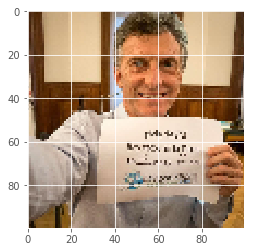

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input

test_image = image.load_img('/mnt/c/source/deep_learning/partidos_politicos/mauricio.jpg', target_size = (100, 100))
numpy_image = img_to_array(test_image)
plt.imshow(np.uint8(numpy_image))
plt.show() 

img_tensor = image.img_to_array(test_image)
img_tensor = np.expand_dims (img_tensor, axis=0)

###Aplicamos una normalización por canal###
x = preprocess_input(img_tensor)

In [0]:
#!pip3 install mtcnn

     |████████████████████████████████| 2.3MB 85kB/s eta 0:00:01
  Stored in directory: /home/juanpablosokil/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [0]:
from mtcnn.mtcnn import MTCNN
import cv2

In [0]:
import glob
path = glob.glob("/mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/*.jpg")
caras = []
for image in path:
    img = cv2.imread(image)
    detector = MTCNN()
    result = detector.detect_faces(img)
    #print('Para la imagen ', img,' el resultado es: ',result)
    array_length = len(result)
    array_length
    
    for i in range(array_length):
        bounding_box = result[i]['box']
        cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
    print('Para la imagen ',image,' La cantidad de caras detectadas es ',i)
    caras.append(i)    
    #cv2.imwrite("ivan_drawn.jpg", img)


Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10005485_128213617924757_1154392281797623808_n.jpg  La cantidad de caras detectadas es  7
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10005719_514383008708563_971946856_n.jpg  La cantidad de caras detectadas es  0
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10246065_399072913567577_1641546804_n.jpg  La cantidad de caras detectadas es  10
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10296906_372017299618891_107642329_n.jpg  La cantidad de caras detectadas es  0
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10311190_644462908974915_1145864465_n.jpg  La cantidad de caras detectadas es  0
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10349759_696117213767490_1597166602_n.jpg  La cantidad de caras d

Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10724884_1517791258463777_995829386_n.jpg  La cantidad de caras detectadas es  5
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10724961_799897630068741_12894576_n.jpg  La cantidad de caras detectadas es  6
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10725005_462910093850197_2092232141_n.jpg  La cantidad de caras detectadas es  1
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10725131_1586155858283743_287190563_n.jpg  La cantidad de caras detectadas es  5
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10725188_1469281880037355_645881176_n.jpg  La cantidad de caras detectadas es  1
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/10727272_309599942557856_1511585855_n.jpg  La cantidad de caras detectadas 

Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/926198_1447552108821411_1818694716_n.jpg  La cantidad de caras detectadas es  2
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/926780_514695375323002_523543447_n.jpg  La cantidad de caras detectadas es  1
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/927171_709079492493762_134933591_n.jpg  La cantidad de caras detectadas es  0
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/927201_1379668298946410_2005020467_n.jpg  La cantidad de caras detectadas es  0
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/927492_1533737446855156_1278369905_n.jpg  La cantidad de caras detectadas es  16
Para la imagen  /mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/927756_1568652176749365_1147309259_n.jpg  La cantidad de caras detectadas es  2
P

Text(0, 0.5, 'Ocurrencias')

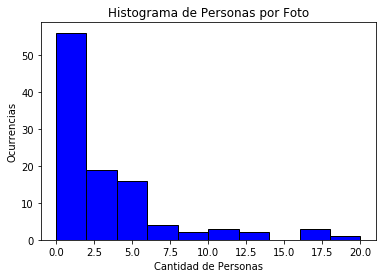

In [0]:
# Import the libraries
import matplotlib.pyplot as plt
#import seaborn as sns

# matplotlib histogram
plt.hist(caras, color = 'blue', edgecolor = 'black')

# seaborn histogram
#sns.distplot(caras, hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histograma de Personas por Foto')
plt.xlabel('Cantidad de Personas')
plt.ylabel('Ocurrencias')

In [0]:
img = cv2.imread("/mnt/c/source/deep_learning/partidos_politicos/train/cristinafkirchner/1168517_235893666608641_1256754028_n.jpg")
detector = MTCNN()


result = detector.detect_faces(img)
array_length = len(result)
array_length
print(result)
caras = []
for i in range(array_length):
    #print(result[i]['box'])
    # Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
    bounding_box = result[i]['box']
    keypoints = result[i]['keypoints']
    cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
    cv2.circle(img,(keypoints['left_eye']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['right_eye']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['nose']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['mouth_left']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['mouth_right']), 2, (0,155,255), 2)
    #print('Termina ',i)

caras.append(i)
    
cv2.imwrite("ivan_drawn.jpg", img)

[{'box': [175, 153, 66, 95], 'confidence': 0.9999924898147583, 'keypoints': {'left_eye': (212, 190), 'right_eye': (236, 195), 'nose': (232, 211), 'mouth_left': (207, 223), 'mouth_right': (229, 228)}}, {'box': [479, 145, 67, 79], 'confidence': 0.999812662601471, 'keypoints': {'left_eye': (498, 180), 'right_eye': (529, 172), 'nose': (517, 193), 'mouth_left': (505, 209), 'mouth_right': (535, 202)}}, {'box': [86, 388, 99, 122], 'confidence': 0.999811589717865, 'keypoints': {'left_eye': (139, 434), 'right_eye': (173, 423), 'nose': (179, 449), 'mouth_left': (155, 484), 'mouth_right': (185, 473)}}, {'box': [399, 241, 61, 76], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (413, 273), 'right_eye': (439, 264), 'nose': (427, 282), 'mouth_left': (423, 301), 'mouth_right': (445, 294)}}, {'box': [20, 121, 76, 98], 'confidence': 0.9997203946113586, 'keypoints': {'left_eye': (54, 158), 'right_eye': (88, 165), 'nose': (77, 177), 'mouth_left': (52, 194), 'mouth_right': (79, 200)}}, {'box':

True

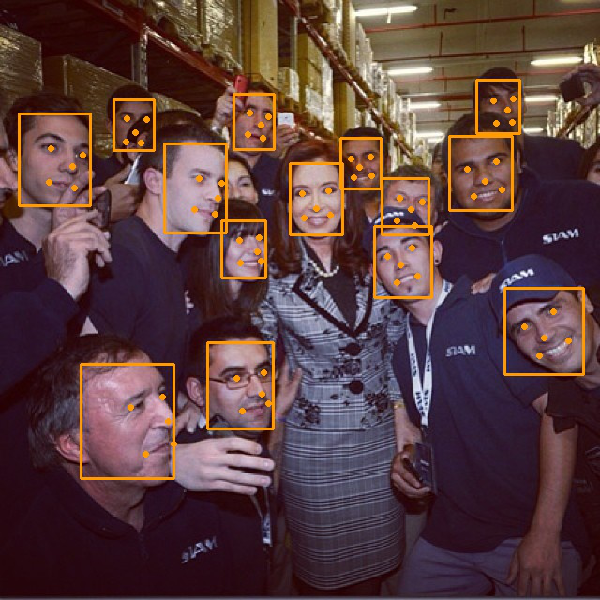

In [0]:

import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

test_image = image.load_img('ivan_drawn.jpg', target_size = (600, 600))
test_image

In [0]:
from keras.models import load_model
from keras.utils import CustomObjectScope
import tensorflow as tf
with CustomObjectScope({'tf': tf}):
  model = load_model('./model/nn4.small2.v1.h5')



##KERAS OPEN FACE